In [0]:
#import the necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#read the file
df = pd.read_excel("Feedback Analysis.xlsx")

In [176]:
#check for null values
df.isnull()

,Batch,Hosteler/Day Scholar,Lab Facilities,Bus Facilities,Canteen and Cafeteria,Mess Food,"Wi-Fi, Bedding and Proper arrangements for wellfare",Faculties' ablility to resolve your query regarding the subject,Faculty Support environment,Library facilities,How much do you support this ?,Problem resolution and Support,Placement Opportunities,What timing do you support ?,Biometric Attendance,5 Working Days?,Zest/Aamod are sufficiently rejuvenating?,Technical events:,Overall College Feedback,Will suggest this college to others?,Suggestions
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
247,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
#Dropping null values from column "Suggestion" 
df1 = df.dropna(axis=0, how = 'any', thresh= None,subset = ["Suggestions"], inplace= True)

In [178]:
#Check whether the above line of code works or not
df["Suggestions"]

9                                              JSS NOIDA
11     Please reduce the college hours or rather set ...
23     Sports facilities need to be improved as stude...
24                                                    No
25     The biggest problem i feel is of stray dogs ei...
                             ...                        
241    It's a very nice college with supporting facul...
243                                                   No
244                                                   No
245                                                   No
248    College need to bring more and best companies ...
Name: Suggestions, Length: 104, dtype: object

In [179]:
#converting Suggestions into a list
Data = df["Suggestions"].to_list()
print(Data)

['JSS NOIDA', 'Please reduce the college hours or rather set 5 working days to prevent the hectic schedule ..thank youðŸ˜Š', 'Sports facilities need to be improved as students are not taking interest to be indulged into any of such activities', 'No', 'The biggest problem i feel is of stray dogs either they should be taken out of the campus or they should be taken proper care. They create nuisance in the campus and present a bad image to the administration...', 'Please set up atleast one committee that will listen to students day to day queries regarding to the college.', 'There is no boundation on studenta to attend full college ', 'Pls change college timing pls change it to 9-4 And please follow 5 working days criteria', 'Everything is fine except timing it should be reduced', 'Jisne bhi change nhi laaye h wo khatam ho gya h ', 'The chief proctor of our college  isnâ€™t enough respectful towards the students, and has no sense of talking whatsoever. He is too rigid to understand the st

In [180]:
print("Number of Suggestions in list :",len(Data))

Words = [sub.split() for sub in Data] 
print(Words)

Number of Suggestions in list : 104
[['JSS', 'NOIDA'], ['Please', 'reduce', 'the', 'college', 'hours', 'or', 'rather', 'set', '5', 'working', 'days', 'to', 'prevent', 'the', 'hectic', 'schedule', '..thank', 'youðŸ˜Š'], ['Sports', 'facilities', 'need', 'to', 'be', 'improved', 'as', 'students', 'are', 'not', 'taking', 'interest', 'to', 'be', 'indulged', 'into', 'any', 'of', 'such', 'activities'], ['No'], ['The', 'biggest', 'problem', 'i', 'feel', 'is', 'of', 'stray', 'dogs', 'either', 'they', 'should', 'be', 'taken', 'out', 'of', 'the', 'campus', 'or', 'they', 'should', 'be', 'taken', 'proper', 'care.', 'They', 'create', 'nuisance', 'in', 'the', 'campus', 'and', 'present', 'a', 'bad', 'image', 'to', 'the', 'administration...'], ['Please', 'set', 'up', 'atleast', 'one', 'committee', 'that', 'will', 'listen', 'to', 'students', 'day', 'to', 'day', 'queries', 'regarding', 'to', 'the', 'college.'], ['There', 'is', 'no', 'boundation', 'on', 'studenta', 'to', 'attend', 'full', 'college'], ['Pls

In [181]:
'''right now we have suggestions as a list of list
now we will convert it into list of words
we can do it with the help of NLTK also
Here we are using simple list comprehension '''
Token = []
for i in Words:
  for _ in i:
    Token.append(_)

Token

['JSS',
 'NOIDA',
 'Please',
 'reduce',
 'the',
 'college',
 'hours',
 'or',
 'rather',
 'set',
 '5',
 'working',
 'days',
 'to',
 'prevent',
 'the',
 'hectic',
 'schedule',
 '..thank',
 'youðŸ˜Š',
 'Sports',
 'facilities',
 'need',
 'to',
 'be',
 'improved',
 'as',
 'students',
 'are',
 'not',
 'taking',
 'interest',
 'to',
 'be',
 'indulged',
 'into',
 'any',
 'of',
 'such',
 'activities',
 'No',
 'The',
 'biggest',
 'problem',
 'i',
 'feel',
 'is',
 'of',
 'stray',
 'dogs',
 'either',
 'they',
 'should',
 'be',
 'taken',
 'out',
 'of',
 'the',
 'campus',
 'or',
 'they',
 'should',
 'be',
 'taken',
 'proper',
 'care.',
 'They',
 'create',
 'nuisance',
 'in',
 'the',
 'campus',
 'and',
 'present',
 'a',
 'bad',
 'image',
 'to',
 'the',
 'administration...',
 'Please',
 'set',
 'up',
 'atleast',
 'one',
 'committee',
 'that',
 'will',
 'listen',
 'to',
 'students',
 'day',
 'to',
 'day',
 'queries',
 'regarding',
 'to',
 'the',
 'college.',
 'There',
 'is',
 'no',
 'boundation',
 'on',

In [182]:
#Create word frequencies using Token
word_freq = pd.Series(Token).value_counts()

#Print top 20 words
word_freq[:20]

the         60
to          54
should      52
and         50
be          47
in          41
college     36
of          34
is          25
for         24
students    22
are         21
timing      19
not         18
time        17
that        15
a           15
on          14
we          13
No          11
dtype: int64

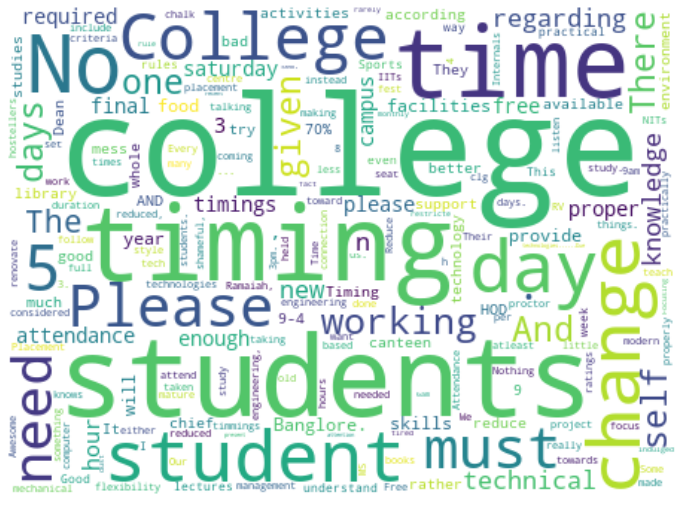

In [183]:
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()